# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


1) Посмотрим на случайные строчки.

2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) 

In [1]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /Users/yaroslavvasilev/Desktop/fwbuefw/train.csv
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 1.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /Users/yaroslavvasilev/Desktop/fwbuefw/test.csv
100%|█████████████████████████████████████████| 218k/218k [00:00<00:00, 834kB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /Users/yaroslavvasilev/Desktop/fwbuefw/submission.csv
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 15.2MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [5]:


# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
392,10,62.25,612.95,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),0
574,29,19.35,601.6,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
435,12,34.00,442.45,Male,0,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,0
4319,2,20.30,40.25,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1460,2,80.60,155.8,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,1


In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.corr(numeric_only=True)

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
ClientPeriod,1.000000,0.249414,0.011561,-0.350640
MonthlySpending,0.249414,1.000000,0.215456,0.184769
IsSeniorCitizen,0.011561,0.215456,1.000000,0.156872
Churn,-0.350640,0.184769,0.156872,1.000000


## Анализ данных

1) Для численных призанков построим гистограмму. Для категориальных посчитаем количество каждого значения для каждого признака.

2) Посмотрим на распределение целевой переменной и выявим являются ли классы несбалансированными.


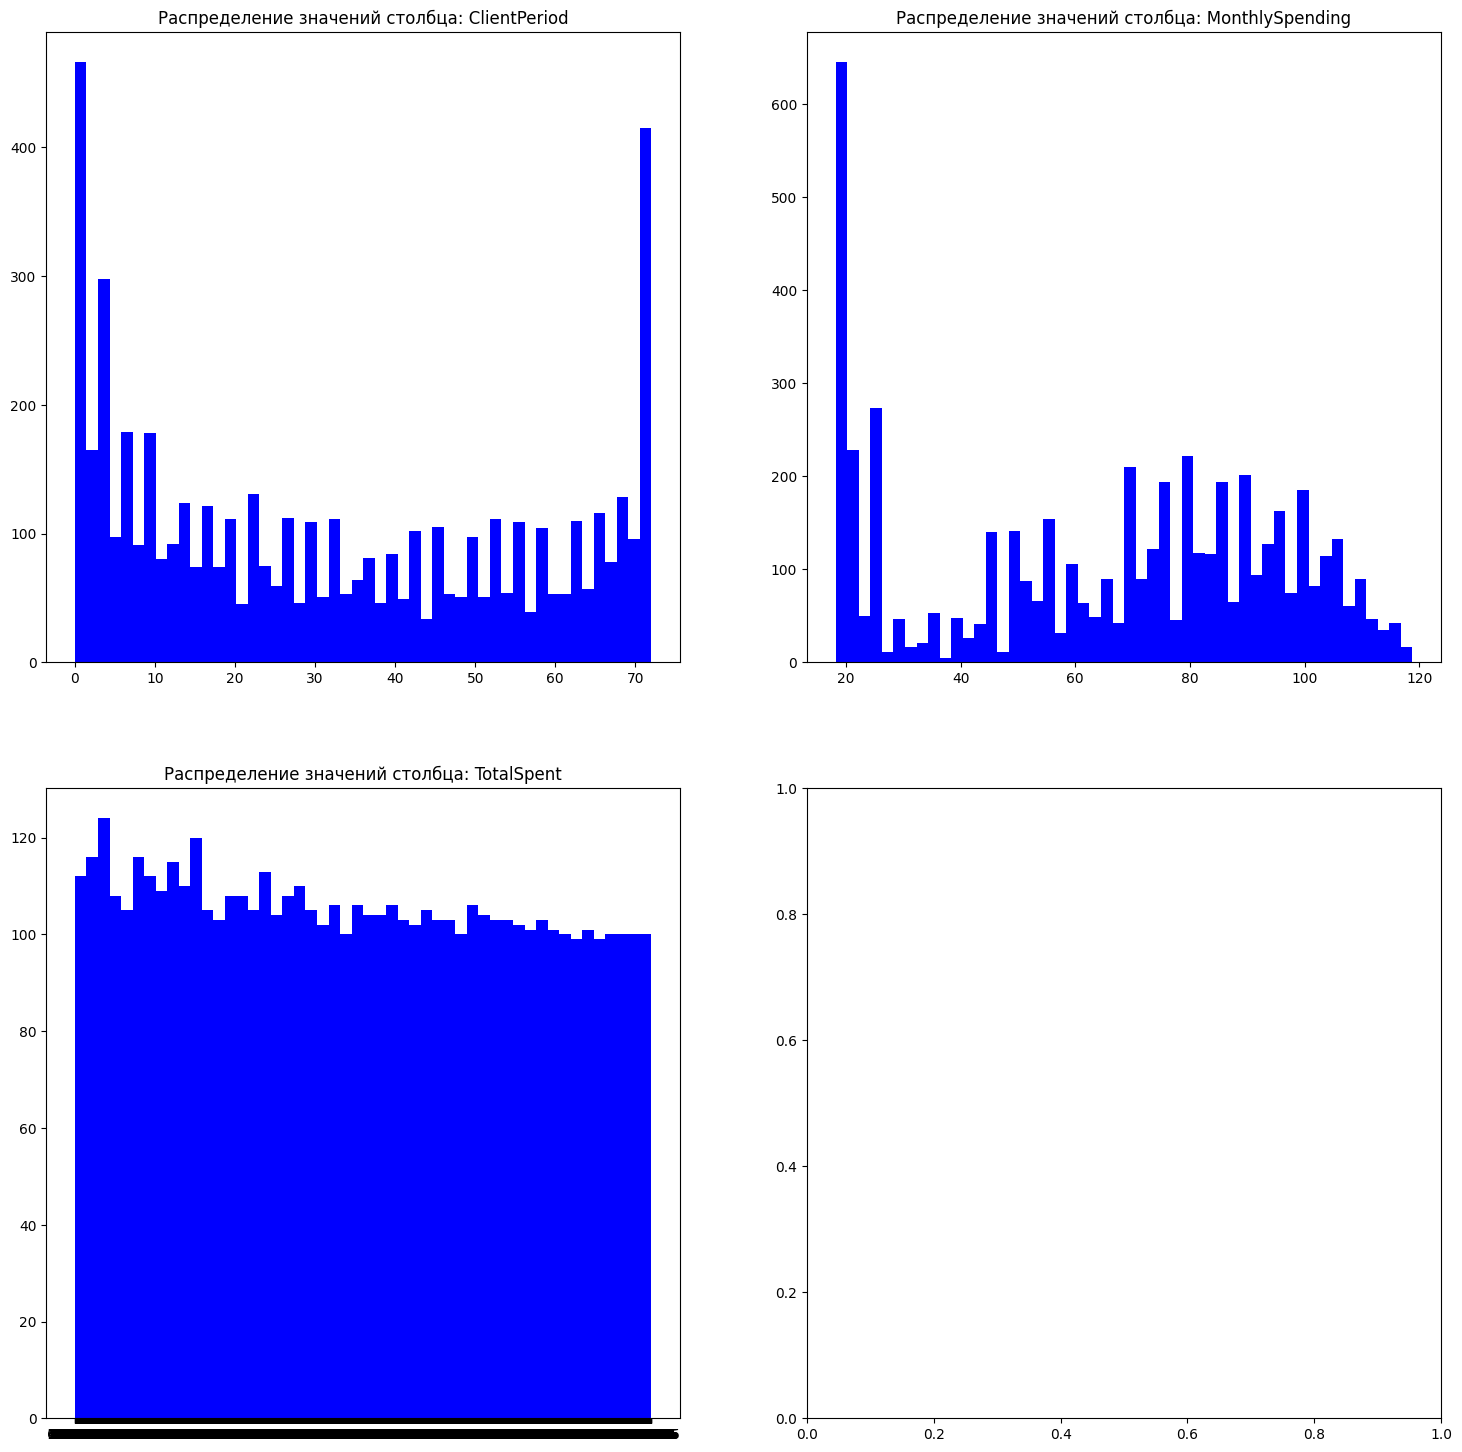

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(18,18))
ax[0, 0].hist(data["ClientPeriod"], bins=50, color="blue")
ax[0, 0].set_title("Распределение значений столбца: ClientPeriod")
ax[0, 1].hist(data["MonthlySpending"], bins=50, color="blue")
ax[0, 1].set_title("Распределение значений столбца: MonthlySpending")
ax[1, 0].hist(data["TotalSpent"], bins=50, color="blue")
ax[1, 0].set_title("Распределение значений столбца: TotalSpent")
plt.show()


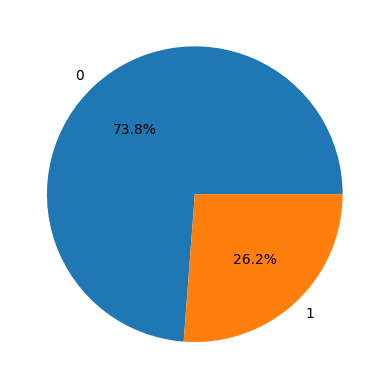

In [11]:
plt.pie(x=data["Churn"].value_counts(), labels=data["Churn"].value_counts().index, autopct='%1.1f%%')
plt.show()

In [13]:
data["TotalSpent"] = data["TotalSpent"].apply(lambda x: np.nan  if " " in x else x)
data["TotalSpent"].isna().sum()

np.int64(9)

In [14]:
data = data.dropna()

In [15]:
data["TotalSpent"] = data["TotalSpent"].astype(float)

In [16]:
for name in data.columns.tolist():
    print(data.groupby(by=name)["Churn"].agg("mean"))

ClientPeriod
1     0.617068
2     0.509091
3     0.462963
4     0.463235
5     0.484536
        ...   
68    0.089552
69    0.081967
70    0.083333
71    0.038168
72    0.017606
Name: Churn, Length: 72, dtype: float64
MonthlySpending
18.25     0.0
18.40     0.0
18.70     0.0
18.80     0.0
18.85     0.0
         ... 
118.20    0.0
118.35    1.0
118.60    0.0
118.65    0.0
118.75    0.0
Name: Churn, Length: 1466, dtype: float64
TotalSpent
18.80      0.000000
18.90      0.000000
19.05      0.000000
19.10      0.333333
19.15      0.000000
             ...   
8564.75    0.000000
8594.40    0.000000
8670.10    0.000000
8672.45    0.000000
8684.80    1.000000
Name: Churn, Length: 4977, dtype: float64
Sex
Female    0.266209
Male      0.258770
Name: Churn, dtype: float64
IsSeniorCitizen
0    0.232453
1    0.420428
Name: Churn, dtype: float64
HasPartner
No     0.325814
Yes    0.195796
Name: Churn, dtype: float64
HasChild
No     0.309576
Yes    0.154039
Name: Churn, dtype: float64
HasPhoneService

In [17]:
df = data.copy(deep=True)
df = df.drop(columns=["Sex"])
cat_cols.remove("Sex")

## Применение линейных моделей 

1) Обработаем данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируем разные значения гиперпараметра C и выберем лучший 

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [19]:
ohe = OneHotEncoder(drop="if_binary", sparse_output=False)
encoded_data = ohe.fit_transform(df[cat_cols])
cols_encoded = ohe.get_feature_names_out()

In [20]:
ohe_data = pd.DataFrame(data=encoded_data, columns=cols_encoded, index=df.index)
new_data = pd.concat([df.drop(columns=cat_cols), ohe_data], axis=1)
new_data

,ClientPeriod,MonthlySpending,TotalSpent,Churn,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,...,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
X = new_data.drop(columns=["Churn"])
y = new_data["Churn"]
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

In [22]:
param_grid = {
    "logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001],
    "logisticregression__penalty": ["l2"]
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step..._iter=5000))])
,param_grid,"{'logisticregression__C': [100, 10, ...], 'logisticregression__penalty': ['l2']}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [24]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.score(X_train, y_train))
logreg = grid.best_estimator_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
0.8451878568666407
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=5000))])
0.8504776041379829


In [25]:
print(grid.score(X_test, y_test))

0.8378082718467932


In [26]:
0.8634095179624565, {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

(0.8634095179624565,
 {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'})

## Применение CatBoost

In [27]:
!pip install catboost

In [28]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=False)
param_cat_grid = {
    "depth": [2, 4, 6],
    "learning_rate": [0.1, 0.05, 0.01],
    "iterations": [500],
    "l2_leaf_reg": [1, 3, 5]
}
X_cat = df.drop(columns=["Churn"])
y_cat = df["Churn"]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2)
grid_for_cat = GridSearchCV(estimator=cat, param_grid=param_cat_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_for_cat.fit(X_train_cat, y_train_cat, cat_features=cat_cols)

    


,estimator,<catboost.cor...t 0x16a709010>
,param_grid,"{'depth': [2, 4, ...], 'iterations': [500], 'l2_leaf_reg': [1, 3, ...], 'learning_rate': [0.1, 0.05, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [29]:
print(grid_for_cat.best_score_)
print(grid_for_cat.best_estimator_)
print(grid_for_cat.best_params_)
print(grid_for_cat.score(X_test_cat, y_test_cat))

0.8497159892184264
{'depth': 2, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
0.8420101063732401
